In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

In [90]:
path = "/home/ball/Videos/BrokeEN/json"
allFiles = glob.glob(path + "/*.json")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_json(file_)
    if len(df) > 0:
        df = df.sort_values("start")
        df["inter_time"] = df["start"].shift(-1) - df["end"]
        df["nsub"] = df["sub"].shift(-1)
        list_.append(df)
    else:
        print(file_)
frame = pd.concat(list_)
frame["sent_time"] = frame["end"] - frame["start"]
frame = frame[frame["inter_time"] >= 0]
frame = frame[frame["sent_time"] >= 0]

In [82]:
len(frame)

60756

In [83]:
len(frame[frame["inter_time"] <= 1])

52375

count    60756.000000
mean         2.330323
std          0.867195
min          0.080000
25%          1.690000
50%          2.200000
75%          2.840000
max          8.820000
Name: sent_time, dtype: float64


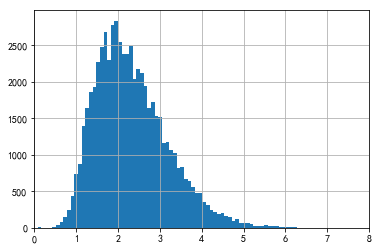

In [84]:
ax = frame["sent_time"].hist(bins=100)
ax.set_xlim((0,8))
print(frame["sent_time"].describe())
plt.show()

count    60756.000000
mean         0.525055
std          1.644112
min          0.000000
25%          0.000000
50%          0.001000
75%          0.290000
max        105.480000
Name: inter_time, dtype: float64


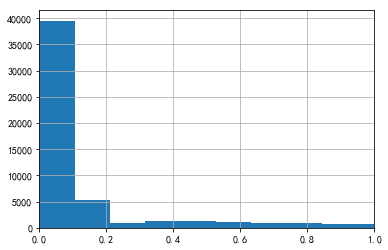

In [85]:
ax = frame["inter_time"].hist(bins=1000)
ax.set_xlim((0,1))
print(frame["inter_time"].describe())
plt.show()

count    50631.000000
mean        35.548755
std         24.324227
min          1.000000
25%         19.000000
50%         30.000000
75%         46.000000
max        252.000000
Name: word, dtype: float64


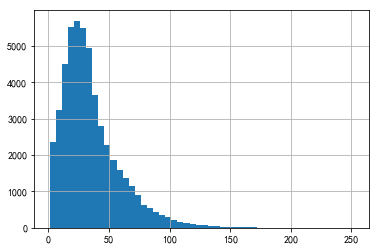

In [92]:
# frame["word"] = frame["sub"].str.split().str.len()
frame["word"] = frame["sub"].str.len()

ax = frame["word"].hist(bins=50)
# ax.set_xlim((0,1))
print(frame["word"].describe())
plt.show()

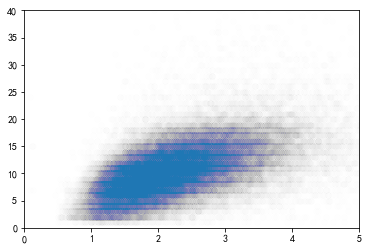

In [87]:
ax = plt.scatter(frame["sent_time"], frame["word"], alpha=0.002, )
plt.xlim(0, 5)
plt.ylim(0, 40)
plt.show()

In [96]:
frame.sort_values("inter_time", ascending=False)[:1]

,end,start,sub,inter_time,nsub,sent_time,word
191,708.192,706.463,Sing,53.231,What are we gonna do,1.729,4
